In [68]:
import datetime
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import random
from operator import itemgetter
import time
import copy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

random.seed(26)


In [69]:
df_train = pd.read_csv("act_train.csv", parse_dates=['date'])

In [70]:
df_ppl = pd.read_csv('people.csv', parse_dates=['date'])

In [71]:
df_test = pd.read_csv('act_test.csv', parse_dates=['date'])

In [72]:
df_sample_submission = pd.read_csv('sample_submission.csv')

In [73]:
df_train_merge = pd.merge(df_train, df_ppl, on='people_id')
df_test_merge = pd.merge(df_test, df_ppl, on='people_id')

In [74]:
train = pd.read_csv('train_converted.csv')

In [75]:
test = pd.read_csv('test_converted.csv')

# make a bar graph to see which column is useful for the prediction.

In [76]:
train.columns

Index(['people_id', 'activity_id', 'activity_category', 'char_1_x', 'char_2_x',
       'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x',
       'char_9_x', 'char_10_x', 'outcome', 'year_x', 'month_x', 'day_x',
       'char_1_y', 'group_1', 'char_2_y', 'char_3_y', 'char_4_y', 'char_5_y',
       'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y', 'char_10_y', 'char_11',
       'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17',
       'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23',
       'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29',
       'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35',
       'char_36', 'char_37', 'char_38', 'year_y', 'month_y', 'day_y'],
      dtype='object')

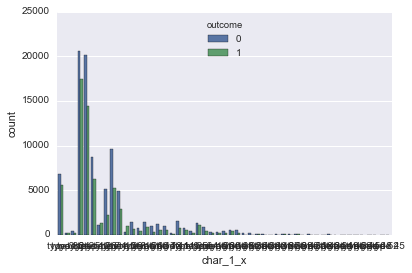

In [77]:
sns.countplot(x='char_1_x', hue='outcome', data=df_train_merge)

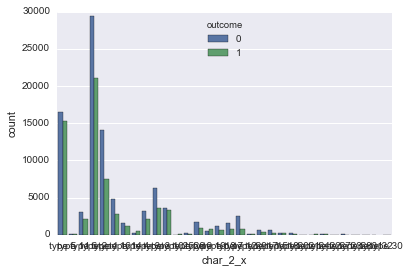

In [13]:
sns.countplot(x='char_2_x', hue='outcome', data=df_train_merge)

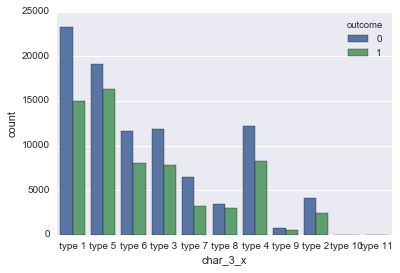

In [14]:
sns.countplot(x='char_3_x', hue='outcome', data=df_train_merge)

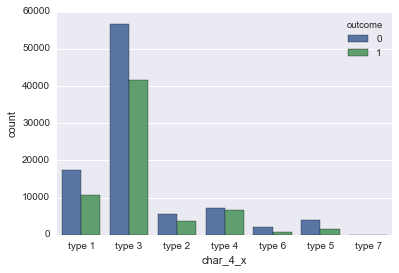

In [15]:
sns.countplot(x='char_4_x', hue='outcome', data=df_train_merge)

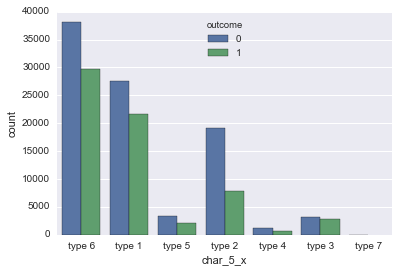

In [16]:
sns.countplot(x='char_5_x', hue='outcome', data=df_train_merge)

##  char_6_x appears not to be useful

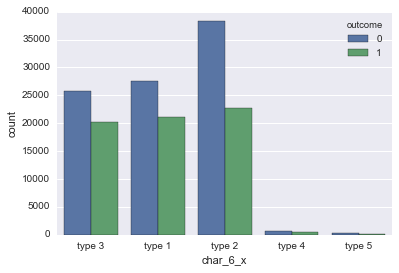

In [17]:
sns.countplot(x='char_6_x', hue='outcome', data=df_train_merge)

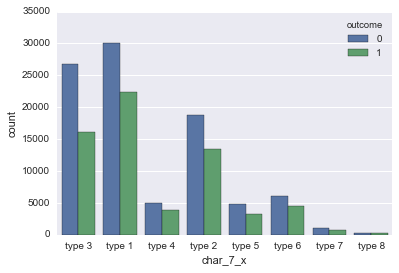

In [18]:
sns.countplot(x='char_7_x', hue='outcome', data=df_train_merge)

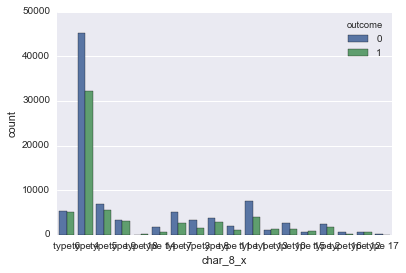

In [19]:
sns.countplot(x='char_8_x', hue='outcome', data=df_train_merge)

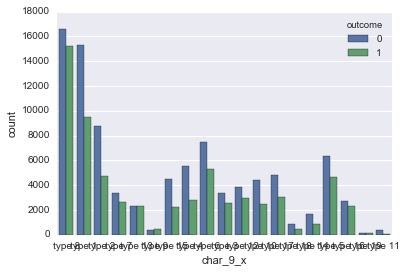

In [20]:
sns.countplot(x='char_9_x', hue='outcome', data=df_train_merge)

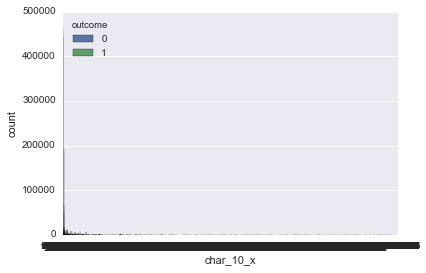

In [21]:
sns.countplot(x='char_10_x', hue='outcome', data=df_train_merge)

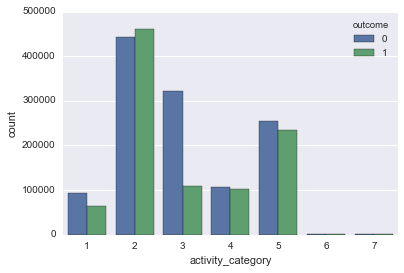

In [22]:
sns.countplot(x='activity_category', hue='outcome', data=train)

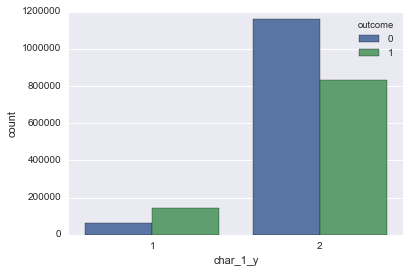

In [24]:
sns.countplot(x='char_1_y', hue='outcome', data=train)

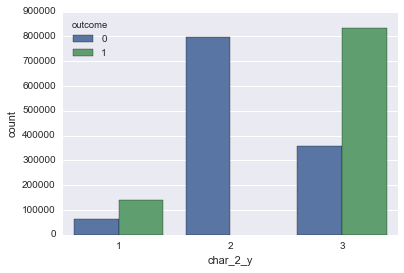

In [26]:
sns.countplot(x='char_2_y', hue='outcome', data=train)

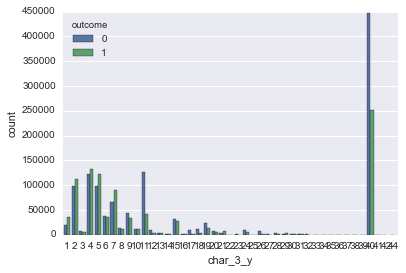

In [27]:
sns.countplot(x='char_3_y', hue='outcome', data=train)

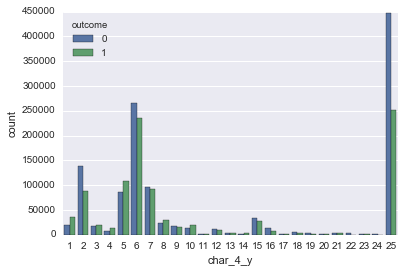

In [28]:
sns.countplot(x='char_4_y', hue='outcome', data=train)

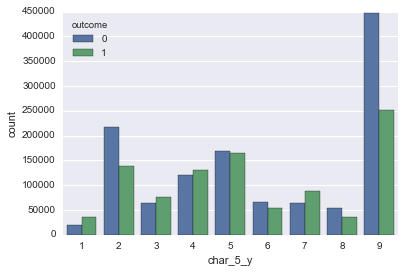

In [29]:
sns.countplot(x='char_5_y', hue='outcome', data=train)

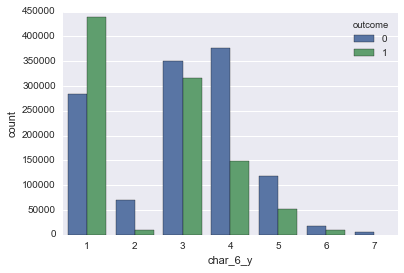

In [30]:
sns.countplot(x='char_6_y', hue='outcome', data=train)

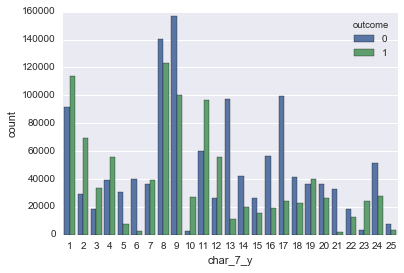

In [31]:
sns.countplot(x='char_7_y', hue='outcome', data=train)

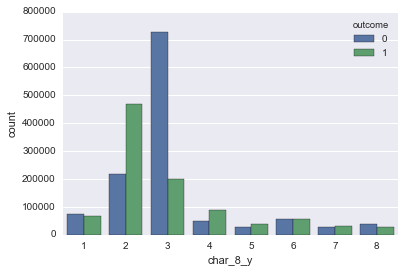

In [32]:
sns.countplot(x='char_8_y', hue='outcome', data=train)

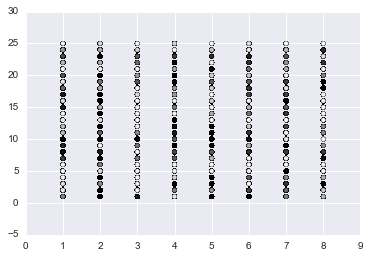

In [36]:
sns.plt.scatter(x='char_8_y', y = 'char_7_y', data = train, c = 'outcome', alpha = 0.1)

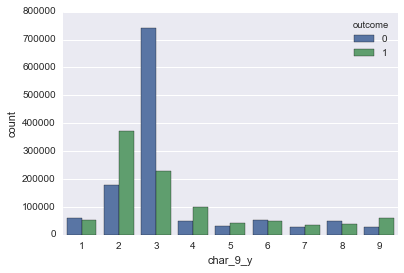

In [37]:
sns.countplot(x='char_9_y', hue='outcome', data=train)

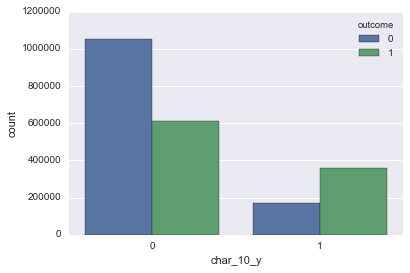

In [38]:
sns.countplot(x='char_10_y', hue='outcome', data=train)

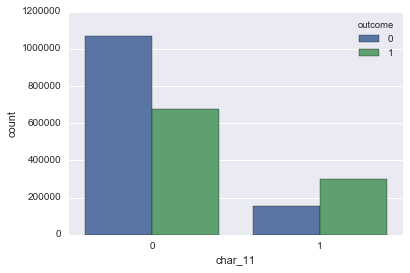

In [39]:
sns.countplot(x='char_11', hue='outcome', data=train)

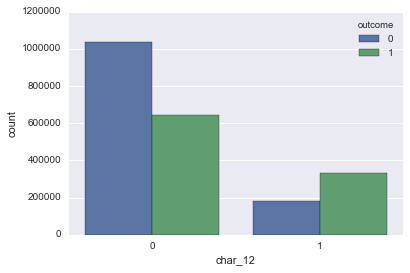

In [40]:
sns.countplot(x='char_12', hue='outcome', data=train)

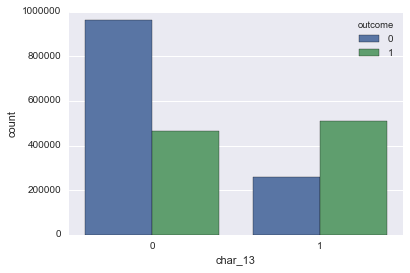

In [41]:
sns.countplot(x='char_13', hue='outcome', data=train)

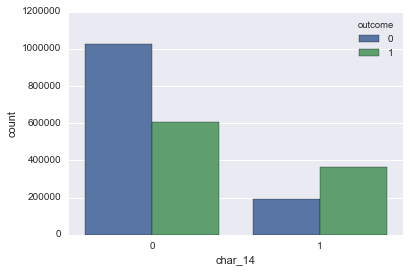

In [42]:
sns.countplot(x='char_14', hue='outcome', data=train)

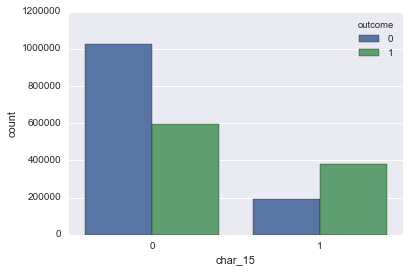

In [43]:
sns.countplot(x='char_15', hue='outcome', data=train)

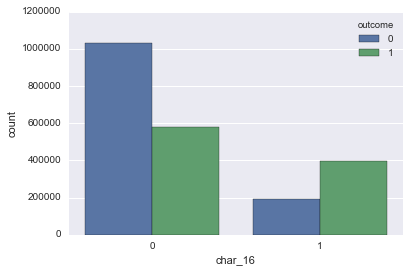

In [44]:
sns.countplot(x='char_16', hue='outcome', data=train)

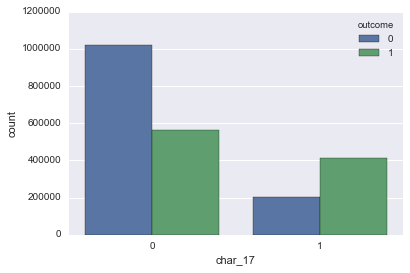

In [45]:
sns.countplot(x='char_17', hue='outcome', data=train)

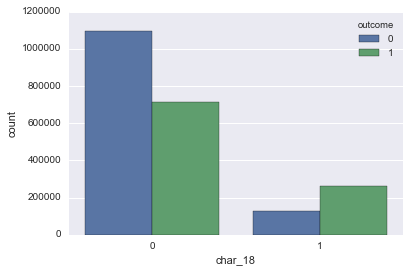

In [46]:
sns.countplot(x='char_18', hue='outcome', data=train)

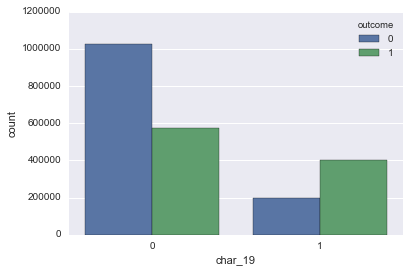

In [47]:
sns.countplot(x='char_19', hue='outcome', data=train)

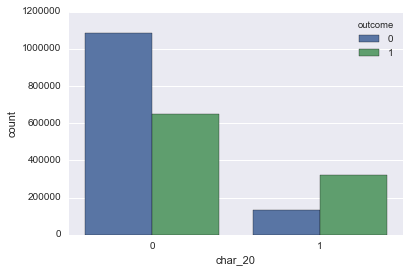

In [48]:
sns.countplot(x='char_20', hue='outcome', data=train)

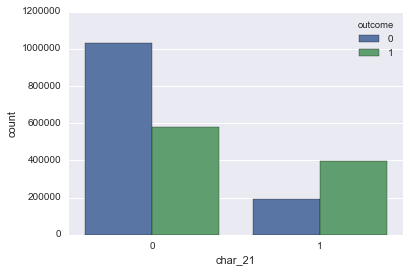

In [49]:
sns.countplot(x='char_21', hue='outcome', data=train)

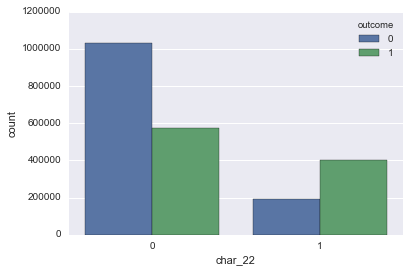

In [50]:
sns.countplot(x='char_22', hue='outcome', data=train)

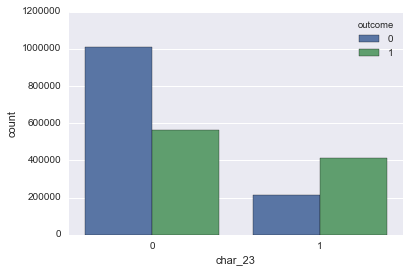

In [51]:
sns.countplot(x='char_23', hue='outcome', data=train)

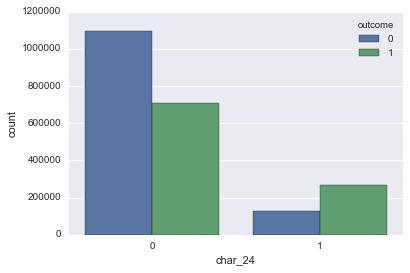

In [52]:
sns.countplot(x='char_24', hue='outcome', data=train)

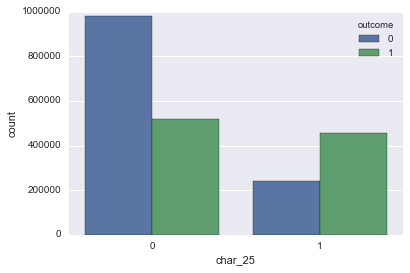

In [53]:
sns.countplot(x='char_25', hue='outcome', data=train)

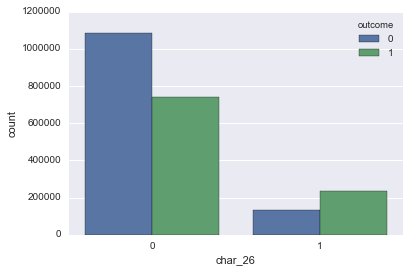

In [54]:
sns.countplot(x='char_26', hue='outcome', data=train)

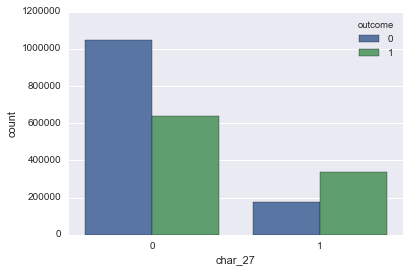

In [55]:
sns.countplot(x='char_27', hue='outcome', data=train)

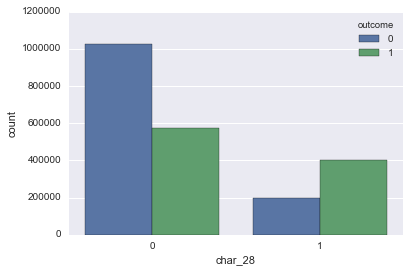

In [56]:
sns.countplot(x='char_28', hue='outcome', data=train)

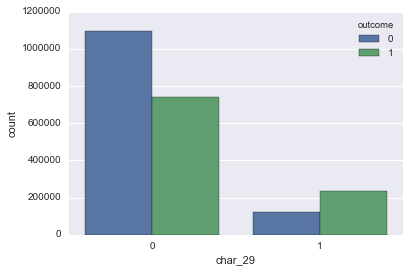

In [57]:
sns.countplot(x='char_29', hue='outcome', data=train)

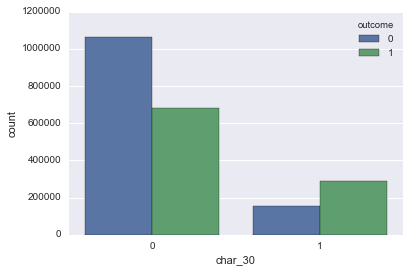

In [58]:
sns.countplot(x='char_30', hue='outcome', data=train)

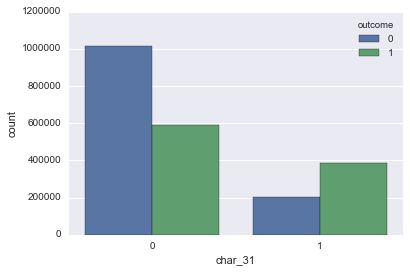

In [59]:
sns.countplot(x='char_31', hue='outcome', data=train)

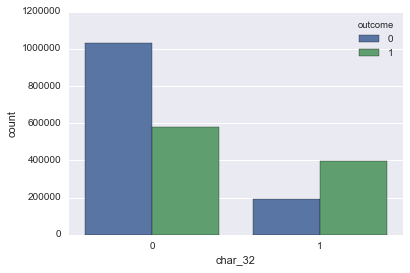

In [60]:
sns.countplot(x='char_32', hue='outcome', data=train)

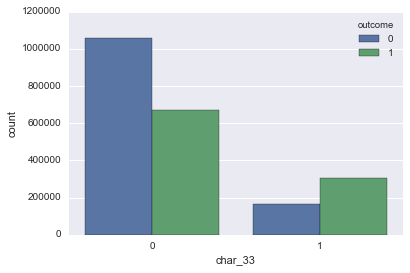

In [61]:
sns.countplot(x='char_33', hue='outcome', data=train)

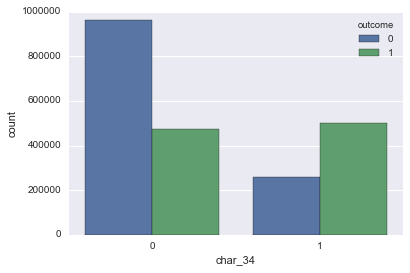

In [62]:
sns.countplot(x='char_34', hue='outcome', data=train)

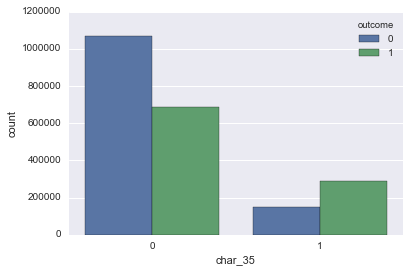

In [63]:
sns.countplot(x='char_35', hue='outcome', data=train)

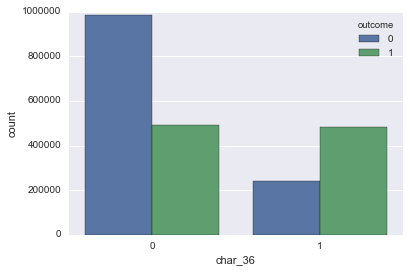

In [64]:
sns.countplot(x='char_36', hue='outcome', data=train)

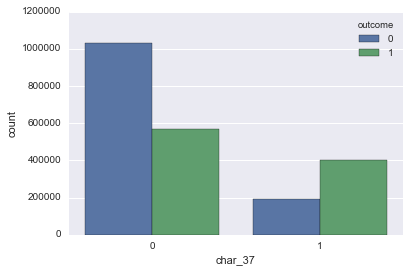

In [65]:
sns.countplot(x='char_37', hue='outcome', data=train)

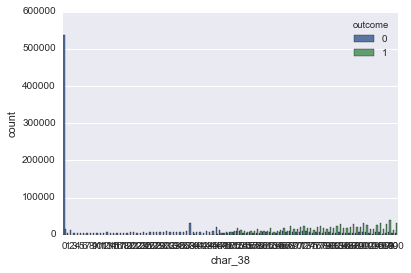

In [67]:
sns.countplot(x='char_38', hue='outcome', data=df_train_merge)